Linear Kernel SVM Accuracy: 0.956140350877193

Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF Kernel SVM Accuracy: 0.9736842105263158

Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



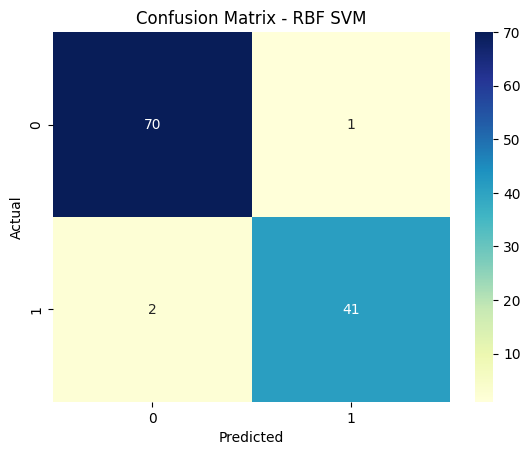

Cross-Validation Accuracy (RBF SVM): 0.9736376339077782


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report (Linear Kernel):\n", classification_report(y_test, y_pred_linear))

svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("RBF Kernel SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report (RBF Kernel):\n", classification_report(y_test, y_pred_rbf))

sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm_rbf, X_scaled, y, cv=5)
print("Cross-Validation Accuracy (RBF SVM):", np.mean(cv_scores))
